In [251]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import operator
from matplotlib.backends.backend_pdf import PdfPages

%matplotlib inline
df = pd.read_csv("./data/notas_merged.csv")
del df["NUMORD"]
del df["SUBTIPO"]
del df["CENTRO"]
del df["PLAN"]

category_counts = {}
categorical_columns = ["CURSO","ANOCON","MUNICIPIO","PROVINCIA","DESPLAN","GENERO"]

COLORS = ["red","blue","yellow","pink","purple","green"]
DESCRIPTIONS = {
    "CURSO":["There are ", " students from the year "],
    "ANOCON":["There are ", " students who graduated in "],
    "MUNICIPIO":["There are ", " students from the municipality of"],
    "PROVINCIA": ["There are ", " students from the province of "],
    "DESPLAN": ["There are ", "students of the plan "],
    "GENERO": ["The are ", " students of gender "]
}

def write_pdf(fname, figures):
    doc = PdfPages(fname)
    for fig in figures:
        fig.savefig(doc, format='pdf')
    doc.close()

for c in categorical_columns:
    df[c] = df[c].astype("category")
    category_counts[c] = dict(df[c].value_counts() )

df = df.sort_values("CURSO")

In [179]:
df.head()

,CURSO,ANOCON,MUNICIPIO,PROVINCIA,NOTA_BASE_4,NOTA_BASE_10,DESPLAN,GENERO
773,1993-94,1993-94S,MADRID,MADRID,1.37,6.24,45091 - INGENIERIA TECNICA EN INFORMATICA DE G...,M
772,1993-94,1993-94S,MADRID,MADRID,1.55,6.60,45091 - INGENIERIA TECNICA EN INFORMATICA DE G...,M
771,1993-94,1993-94S,MADRID,MADRID,1.92,7.34,45091 - INGENIERIA TECNICA EN INFORMATICA DE G...,H
260,1994-95,1994-95J,GETAFE,MADRID,1.67,6.84,45091 - INGENIERIA TECNICA EN INFORMATICA DE G...,M
278,1994-95,1994-95J,LEGANES,MADRID,1.20,5.90,45191 - INGENIERIA TECNICA EN INFORMATICA DE S...,M


2003-04
2002-03J
 MADRID
MADRID
36091 - INGENIERIA EN INFORMATICA
H


{'H': <matplotlib.axes._subplots.AxesSubplot at 0x12e36b438>,
 'M': <matplotlib.axes._subplots.AxesSubplot at 0x12e044160>}

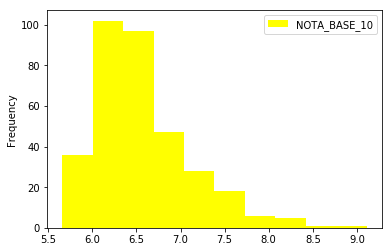

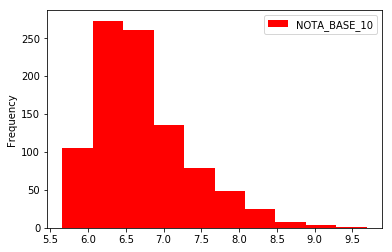

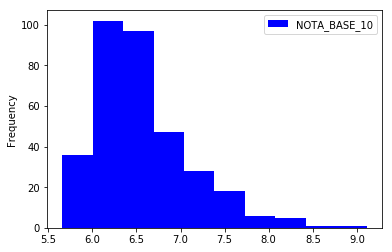

In [259]:
df_h = df[df["GENERO"]=="H"]
generate_plot(df_m)
category_counts_most_frequent = {}

for c in category_counts:
    max_cat = max(category_counts[c].items(), key=operator.itemgetter(1))[0]
    print(max_cat)
    category_counts_most_frequent[c] = {
            max_cat : category_counts[c][max_cat]
    }

def generate_grade_plot(X):
    """ Generates grade plot for a certain subgroup """
    return X.plot(kind='hist', y="NOTA_BASE_10",color=random.choice(COLORS))

def generate_grade_plots(X,c):
    plots = {}
    for cat in category_counts[c]:
        X_aux = X[X[c] == cat]
        plots[cat] = generate_grade_plot(X_aux)
    return plots

def generate_category_count_pie(c):
    fig = plt.figure()
    plt.pie([v for v in category_counts[c].values()], labels=[k for k in category_counts[c].keys()], autopct=None)
    return fig

def generate_category_count_bar(c):
    fig = plt.figure()
    plt.bar(range(len(category_counts[c])), list(category_counts[c].values()), align='center',color=random.choice(COLORS))
    plt.xticks(range(len(category_counts[c])), list(category_counts[c].keys()))
    return fig

def generate_description(category_counts):
    report = ""
    for c in categorical_columns:
        for cat in category_counts[c]:
            report += DESCRIPTIONS[c][0] + str(category_counts[c][cat]) + DESCRIPTIONS[c][1] + str(cat) +". "
    return report
generate_grade_plots(df,"GENERO")

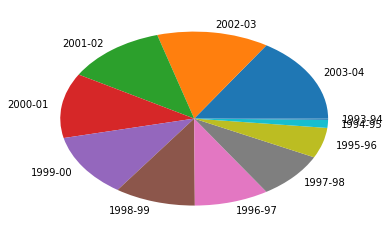

In [248]:
D = category_counts["CURSO"]


figu = generate_category_count_pie("CURSO")

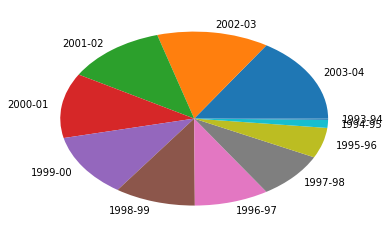

In [249]:
figu

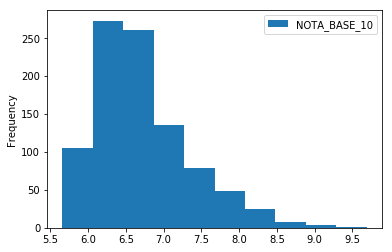

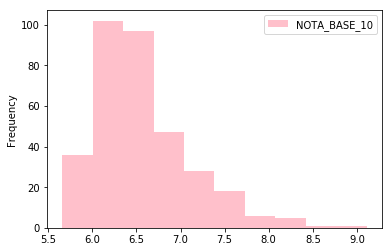

In [128]:
df_h = df[df["GENERO"]=="H"]
df_m = df[df["GENERO"]=="M"]
plot_notas_hombres = df_h.plot(kind='hist', y="NOTA_BASE_10")
plot_notas_mujeres = df_m.plot(kind='hist', y="NOTA_BASE_10",color="pink")

'YlGn'

KeyError: 'CENTRO'

In [9]:
domain_analysis = {
    "attribute_list": [
        "CENTRO",
        "CURSO",
        "PLAN",
        "ANOCON",
        "MUNICIPIO",
        "PROVINCIA",
        "NOTA_BASE_4",
        "NOTA_BASE_10",
        "DESPLAN",
        "GENERO"
    ],
    "knowledge": {
        "column_stats": {
            "CURSO": {
                "metric": "distribution",
                "value": 0
            },
            "PLAN": {
                "metric": "distribution",
                "value": 0
            },
            "ANOCON": {
                "metric": "distribution",
                "value": 0
            },
            "MUNICIPIO": {
                "metric": "distribution",
                "value": 0
            },
            "PROVINCIA": {
                "metric": "distribution",
                "value": 0
            },
            "NOTA_BASE_4": {
                "metric": "distribution",
                "value": 2.1
            },
            "NOTA_BASE_10": {
                "metric": "num_metric",
                "value": 7.5
            },
            "DESPLAN": {
                "metric": "distribution",
                "value": 0
            },
            "SUBTIPO": {
                "metric": "distribution",
                "value": 0
            },
            "GENERO": {
                "metric": "distribution",
                "value": 0
            }
        },
        
    }

}

In [8]:

user_profile = {
    "nombre_usuario": {
        "user_knowledge": {
            "age": 20,
            "class": "student",
            "gender": "female",
            "curso": "CURSO del usuario aqui",
            "numord": "ID del usuario aquí"
        },
        "profile_knowledge": {
            "stats": {
                "NOTA_BASE_10": {
                    "metric": {
                        "comparison": { 
                            "group": {
                                "NUMORD": "ID del usuario aquí",
                                "color": "red"
                            },
                            "group": {
                                "CURSO": "CURSO del usuario aqui",
                                "color": "red"

                            },
                            "metric": "distribution"
                        }
                    },
                    "show": {
                        "graph": "lines"
                    }
                }
            }
        }

    }
}

user_teacher = {
    "nombre_profesor": {
        "user_knowledge": {
            "age": 48,
            "class": "teacher",
            "gender": "female",
            "curso": "Curso del profesor aqui"
        },
        "profile_knowledge": {
            "stats": {
                "CURSO": { 
                    "metric": "category_count",
                    "show": "text"
                },
                "DESPLAN": { 
                    "metric": "category_count",
                    "show": "text"
                },
                "MUNICIPIO": { 
                    "metric": {
                        "value": "category_count",
                    },
                    "show": "pie",


                },
                "PROVINCIA": {
                    "metric": "category_count",
                    "show": "text"

                },
                "NOTA_BASE_10": {
                    "metric": {
                        "comparison": {
                            "group": {
                                "CURSO": "Curso del profesor aqui",
                                "color": "red"
                            },
                            "group": {
                                "CURSO": "all",
                                "color": "red"

                            },
                            "metric": "distribution"
                        }
                    },
                    "show": {
                        "graph": "lines"
                    }
                }
            }
        }
    }


}

user_manager = {
    "nombre_gestor": {
        "user_knowledge": {
            "age": 38,
            "class": "manager",
            "gender": "male"
        },

        "profile_knowledge": {
            "column_stats": {
                "CURSO": { 
                    "metric": "category_count",
                    "show": "text"
                },
                "DESPLAN": { 
                    "metric": "category_count",
                    "show": "text"
                },
                "MUNICIPIO": {
                    "metric": "category_count",
                    "show": "text"

                },
                "PROVINCIA": {
                    "metric": "category_count",
                    "show": "text"

                },
                "NOTA_BASE_10": {
                    "metric": {
                        "comparison": { 
                            "group": {
                                "GENERO": "H",
                                "color": "blue"
                            },
                            "group": {
                                "GENERO": "M"
                            },
                            "metric": "distribution"
                        }
                    },
                    "show": {
                        "graph": "lines"
                    }
                },
                "GENERO": {
                    "metric": {
                        "comparison": { 
                            "group": {
                                "GENERO": "H",
                                "color": "red"

                            },
                            "group": {
                                "GENERO": "M",
                                "color": "blue"
                            },
                            "metric": "distribution"
                        }
                    },
                    "show": {
                        "graph": "lines"
                    }

                }
            }
        }

    }


}